In [1]:
import networkx
import numpy
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
from datetime import datetime
import jaydebeapi
import json

In [2]:
class network():
    def __init__(self, color, graph):
        self.data_folder = 'C:/projects/mrt/data'
        self.color=str(color)
        self.df=None
        self.graph=graph
    def import_data(self):
        self.df=pandas.read_csv('C:/projects/mrt/data/%s.csv' %self.color)
        return self.df
    def node_edge(self):
        df_new = self.df[self.df['交會路線'].notnull()]
        for i in range(len(self.df['交會路線'])):
            for j in range(df_new.shape[0]):
                weight=(df_new['交會路線'].iloc[j].count(" "))+1
                if self.df['車站編號'][i]==df_new['車站編號'].iloc[j]:
                    self.graph.add_nodes_from(list(range(len(self.df['車站編號']))), weight=weight*20, color=self.color)
                #else:
                    #self.graph.add_nodes_from(list(range(len(self.df['車站編號']))), weight=20, color=self.color)
        for i in range(0,(len(self.df['車站編號'])-1)):
            self.graph.add_edge(i, i+1, weight=10)
        return self.graph
    def count_weight(self):
        df_new = self.df[self.df['交會路線'].notnull()]
        for j in range(df_new.shape[0]):
            weight=(df_new['交會路線'].iloc[j].count(" "))+1
        return weight
    def draw_plt(self):
        #fig=plt.subplots(dpi=360)
        networkx.draw(self.graph, with_labels=True, font_weight='light', edge_color=self.color)
        #fig.tight_layout()
        plt.show()
        return fig


In [3]:
graph=networkx.Graph()

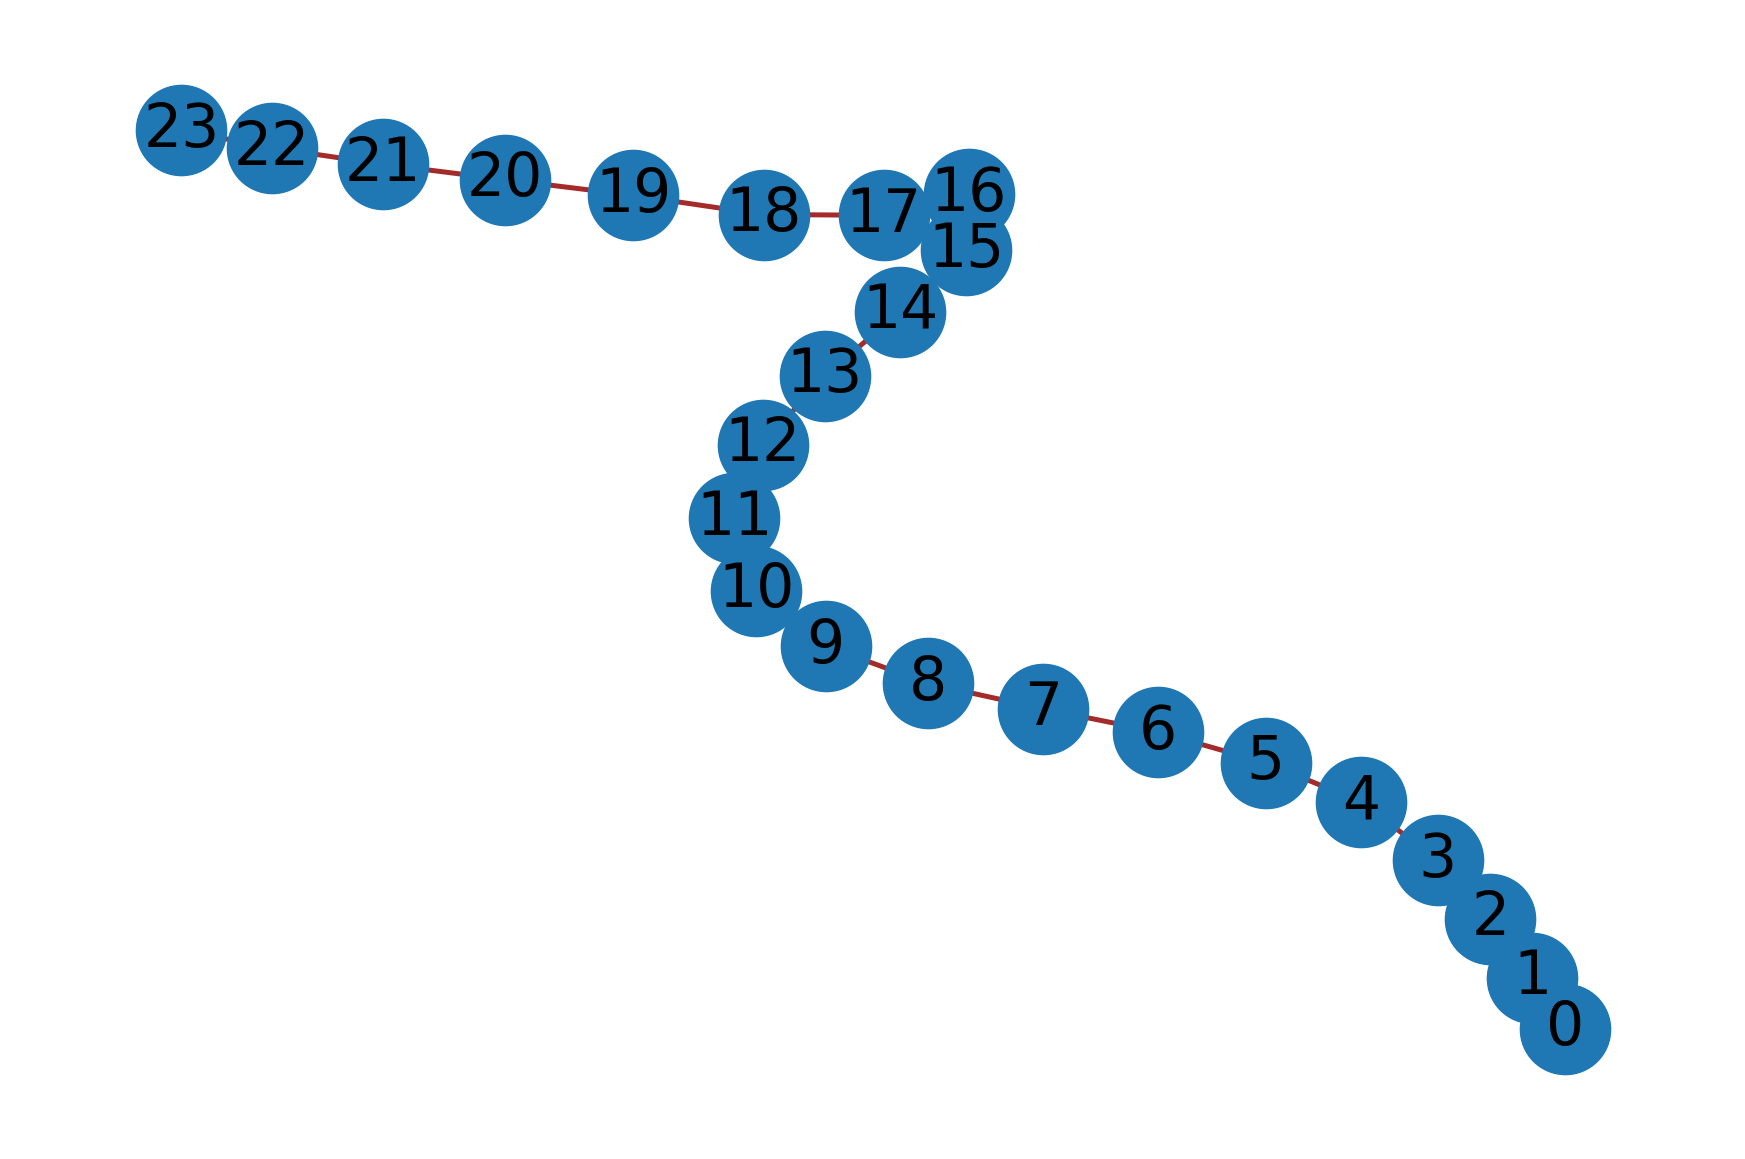

(<Figure size 2160x1440 with 1 Axes>, <AxesSubplot:>)


In [4]:
if __name__ == '__main__':
    BR = network(color='brown', graph=graph)
    df_BR=BR.import_data()
    fig=BR.node_edge()
    fig=plt.subplots(dpi=360)
    fig=BR.draw_plt()
    print(fig)

In [ ]:
    R = network(color='red', graph=graph)
        df_R=R.import_data()
        fig=R.node_edge()
        fig=R.draw_plt()
        print(fig)